# Application of Linear Regression

In [10]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from numpy import linalg as LA

## Audio Files

We have access to the audio files *borgesRuido.wav* and *borgesFiltrado.wav*. One of the files corresponds to a signal with some noise at 3000 Hz, and the other one corresponds to that same signal, but filtered through a FIR filter of order 50.

From the two signals, with noise and filtered, estimate the 50 coefficients of the FIR filter using linear regression. Remember that in a FIR filter of order $N$, each value of the output sequence corresponds to the weighted sum of the last $N$ samples of the input signal:

$$y_n = b_0x_n + b_1x_{n-1} + ... + b_Nx_{n-N}$$

Where

$$x = [x_1, ..., x_M] \hspace{25px} \text{Input signal}$$
$$y = [y_1, ..., y_M] \hspace{25px} \text{Output signal}$$
$$b_i \hspace{25px} \text{i-th coefficient of the filter}$$

With $M >> N$. Also note that $b_i$ corresponds to the value of the impulse response at time $i$ with $0 \leq i \leq N$.


In [11]:
# Read files
samprate1, yr = wavfile.read('borgesRuido.wav')
samprate2, yf = wavfile.read('borgesFiltrado.wav')

## Part 1 - Fourier Transform

Information about handling the Fourier Transform on *SciPy* was found [here](https://realpython.com/python-scipy-fft/).

### Signal 1

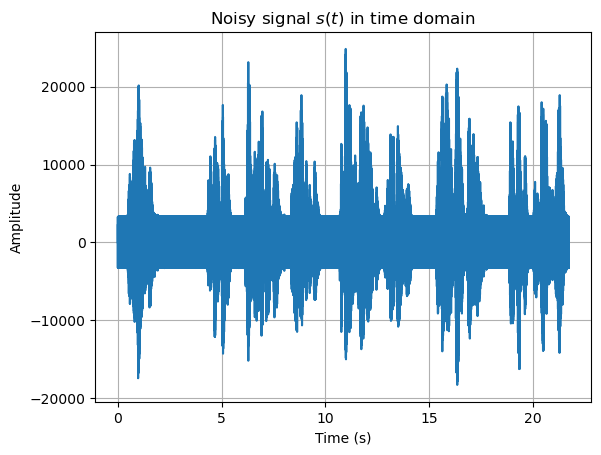

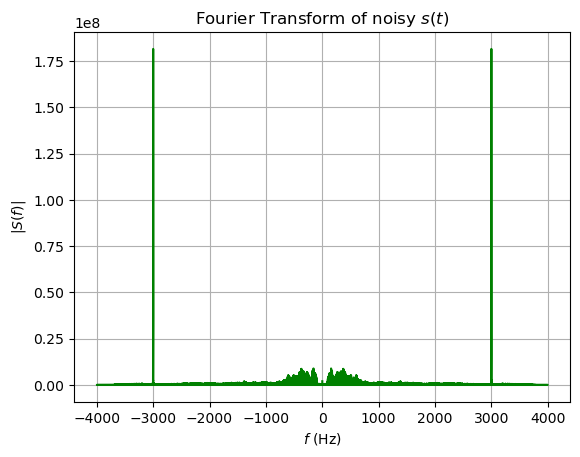

In [12]:
length1 = yr.shape[0]/samprate1

t = np.linspace(0, length1, yr.shape[0])
duration = int(length1) # seconds

plt.plot(t, yr)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Noisy signal $s(t)$ in time domain")
plt.show()

N = samprate1*duration
fourieryr = fft(yr)
f1 = fftfreq(yr.shape[0], 1/samprate1)

plt.figure()

plt.plot(f1, np.abs(fourieryr), color='g')
plt.grid()
plt.xlabel('$f$ (Hz)')
plt.ylabel('|$S(f)$|')
plt.title("Fourier Transform of noisy $s(t)$")
plt.show()

### Signal 2

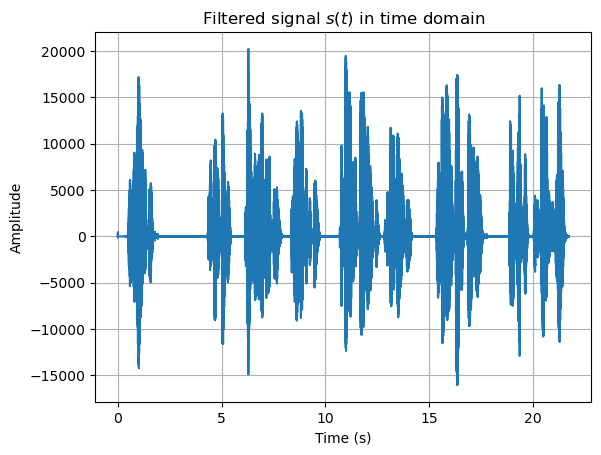

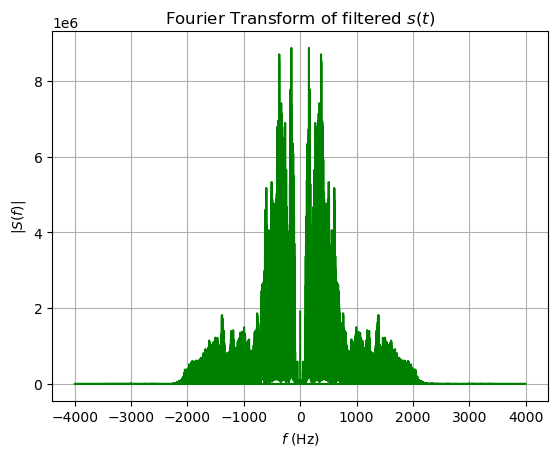

In [13]:
length2 = yf.shape[0]/samprate2

t = np.linspace(0, length2, yf.shape[0])
duration = int(length2) # seconds

plt.plot(t, yf)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Filtered signal $s(t)$ in time domain")
plt.show()

fourieryf = fft(yf)
f2 = fftfreq(yf.shape[0], 1/samprate2)

plt.figure()

plt.plot(f2, np.abs(fourieryf), color='g')
plt.grid()
plt.xlabel('$f$ (Hz)')
plt.ylabel('|$S(f)$|')
plt.title("Fourier Transform of filtered $s(t)$")
plt.show()

## Part 2 - Linear Regression

In [14]:
# Filter order
N = 50

# The input is the signal before filtering.
x = yr

# The output is the signal after filtering.
y = yf

# Define the vector Y to take the data from position N onwards.
Y = y[N:]

# Construct the matrix H
H = np.zeros((len(Y), N + 1))
for i in range(len(Y)):
    for j in range(N + 1):
        H[i, j] = x[N + (i - j)]

# Estimate the parameters
theta = LA.inv((H.T) @ H) @ (H.T) @ (Y)

print(f'theta: \n {theta}')

print(H[0, 0])


theta: 
 [ 1.00578152e-03  9.67104225e-06 -1.32292307e-03  1.85733092e-05
  2.04760923e-03  2.80239758e-05 -3.46253585e-03  3.89369898e-05
  5.43905344e-03  5.32931657e-05 -8.50026852e-03  6.94572228e-05
  1.24197453e-02  8.73226387e-05 -1.82041964e-02  1.03721241e-04
  2.58854205e-02  1.16442209e-04 -3.79798063e-02  1.29077704e-04
  5.78710147e-02  1.40603547e-04 -1.02723328e-01  1.43709021e-04
  3.16695341e-01  4.99655903e-01  3.16693289e-01  1.45493122e-04
 -1.02723504e-01  1.39293625e-04  5.78717111e-02  1.29077443e-04
 -3.79795041e-02  1.14752062e-04  2.58864916e-02  1.02084797e-04
 -1.82025840e-02  8.91885921e-05  1.24165660e-02  7.17171617e-05
 -8.50274341e-03  5.62417362e-05  5.43513969e-03  4.28253254e-05
 -3.46467894e-03  2.91141780e-05  2.04507426e-03  1.99584005e-05
 -1.32338520e-03  1.13982116e-05  1.00480611e-03]
-3277.0


To calculate the coefficients of the FIR filter of order $N$, it is necessary to consider that the equation defining the response of said filter is:
$$y(k) = \sum_{i=0}^N \theta_i x(k-i)$$
where the $\theta_i$ represent the coefficients that filter the input signal $x(k)$.

As known from the usual linear regression problem, to estimate the parameters $\theta$, knowing the filter output and its input, the equation defining the regression parameters is:
$$\theta^* = (H^TH)^{-1}H^TY$$
where the vector $Y$ is defined as

$$Y = \begin{bmatrix}
y[N]\\
y[N+1]\\
y[N+2]\\
\vdots
\end{bmatrix}$$

while the matrix $H$ is given by the expression:

$$H = \begin{bmatrix} 
    x[N] & x[N-1] & \dots & x[0]\\
    x[N+1] & x[N] & \dots & x[1]\\
    x[N+2] & x[N+1] & \dots & x[2]\\
    \vdots & \vdots & \ddots & \vdots\\
    \end{bmatrix}$$

Hence, it is known that the matrix $H$ will be of size $(sizeY-N)$ x $(N+1)$ and that the vector $Y$ must have size $(sizeY-N)$ x $1$


## Part 3 - Canceled Frequencies

The spectrum of the recently found coefficients is found to determine the frequencies that are nullified and those that the filter allows to pass.


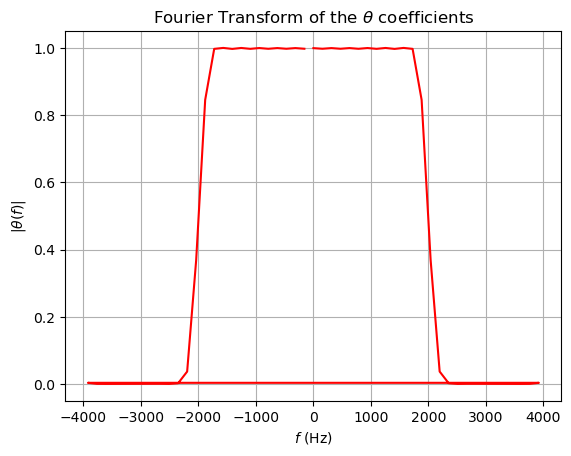

In [15]:
fouriertheta = fft(theta)
fs = fftfreq(np.size(theta), 1/samprate2)

plt.figure()

plt.plot(fs, np.abs(fouriertheta), color='r')
plt.grid()
plt.xlabel('$f$ (Hz)')
plt.ylabel(r'|$\theta(f)$|')
plt.title(r"Fourier Transform of the $\theta$ coefficients")
plt.show()

### Conclusion

It can be observed that the filter has the effect of nullifying all frequencies higher than 2000 Hz (approximately). It can be argued that this is the expected result because the noise seen in signal 1 is located at the frequency of 3000 Hz. After passing through the filter, the noise is eliminated because all frequencies higher than 2000 Hz are filtered out by the FIR filter.

Comparing with the frequency response of the filtered signal shown in part 1, it can be stated that the found coefficients are correct as their frequency response only allows frequencies lower than 2000 Hz (approximately) to pass, and in the frequency response of the filtered signal from part 1, there are only non-zero frequencies in this band (-2000 Hz and 2000 Hz).